In [ ]:
# Correllation

# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots

df = pd.read_csv(r'D:\Data Projects\Project 4\movies.csv')

In [57]:
df = df.dropna()

In [58]:
# Looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00


In [59]:
# Checking if there is missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [60]:
# Data Types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [61]:
#Changing data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [62]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.60,"140,000.00",Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.00
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.50,"102,000.00",Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.00
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.60,"53,000.00",Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.00
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.80,"42,000.00",Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.00


In [63]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,"1,100,000.00",James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.00
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,"903,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.00
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,"1,100,000.00",James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.00
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,"876,000.00",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.00
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,"897,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.80,"3,500.00",Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.00
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.50,"1,900.00",Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.00
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.80,"43,000.00",John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.00
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.90,"2,300.00",Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.00


In [64]:
# Drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.60,"140,000.00",Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.00
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.50,"102,000.00",Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.00
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.60,"53,000.00",Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.00
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.80,"42,000.00",Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.00


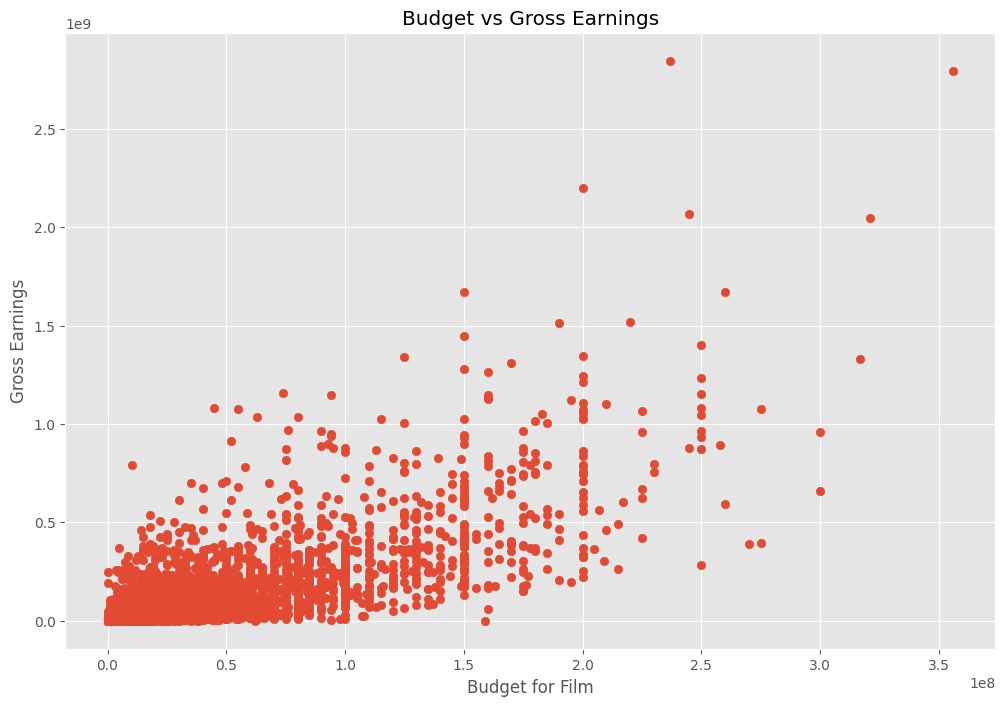

In [65]:
# Scatter Plot with budget vs gross revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

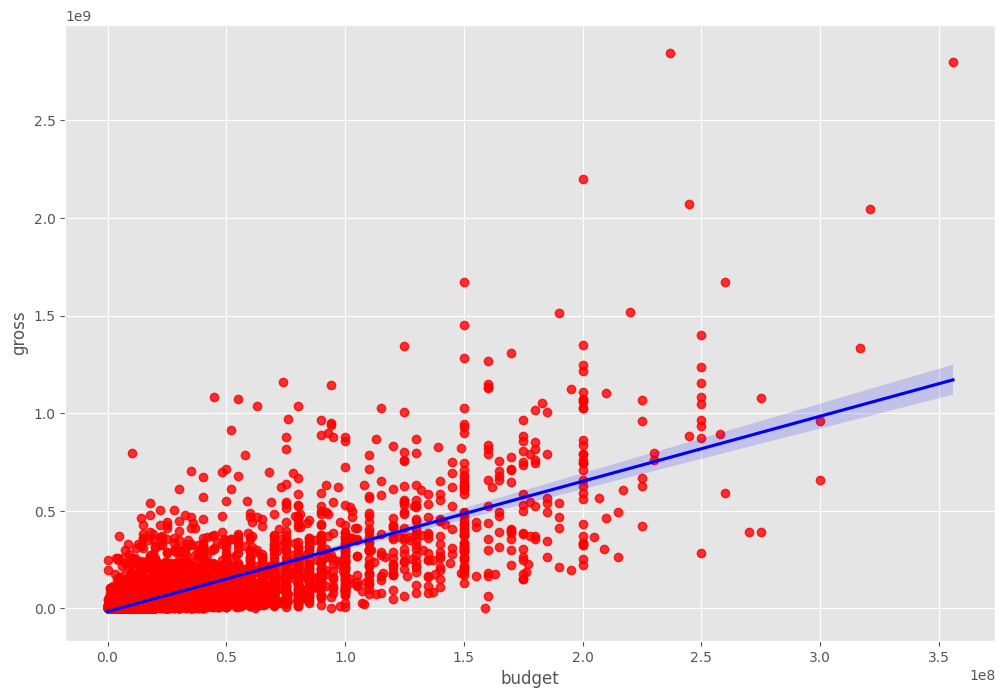

In [66]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"b"})

In [ ]:
# Pearson Correlation Method

df.corr(numeric_only=True, method='pearson')

,year,score,votes,budget,gross,runtime
year,1.00,0.06,0.21,0.33,0.27,0.08
score,0.06,1.00,0.47,0.07,0.22,0.41
votes,0.21,0.47,1.00,0.44,0.61,0.35
budget,0.33,0.07,0.44,1.00,0.74,0.32
gross,0.27,0.22,0.61,0.74,1.00,0.28
runtime,0.08,0.41,0.35,0.32,0.28,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

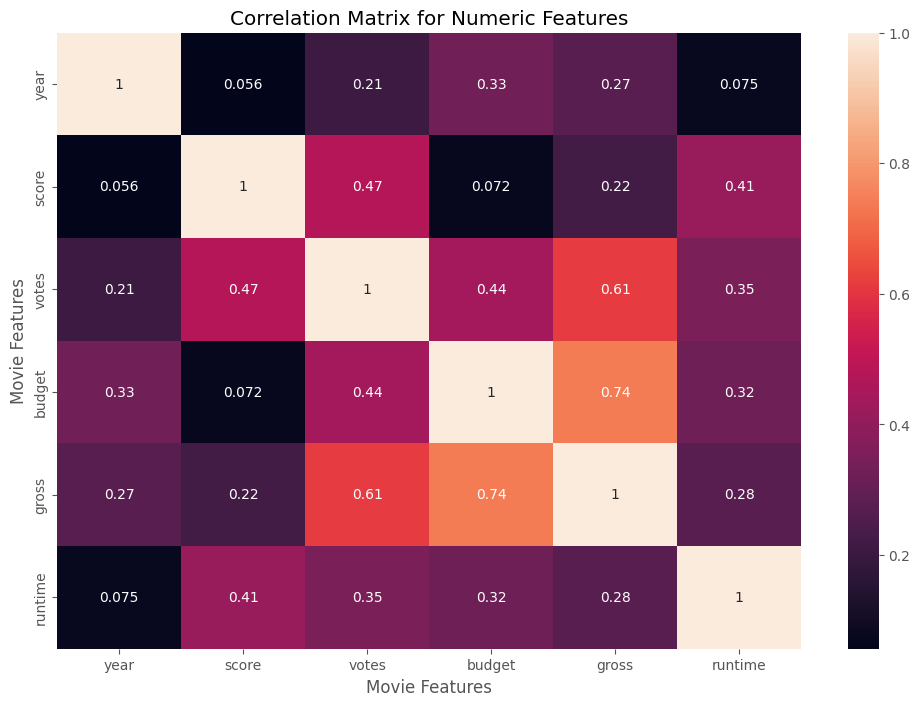

In [68]:
# Correlation Matrix
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [69]:
# Finding average gross earnings of each company

average_earnings = df.groupby('company')['gross'].transform('mean')
df['Average_Gross_Earnings'] = average_earnings
pd.set_option('display.float_format', '{:,.2f}'.format)
#df[['company', 'Average_Gross_Earnings']]

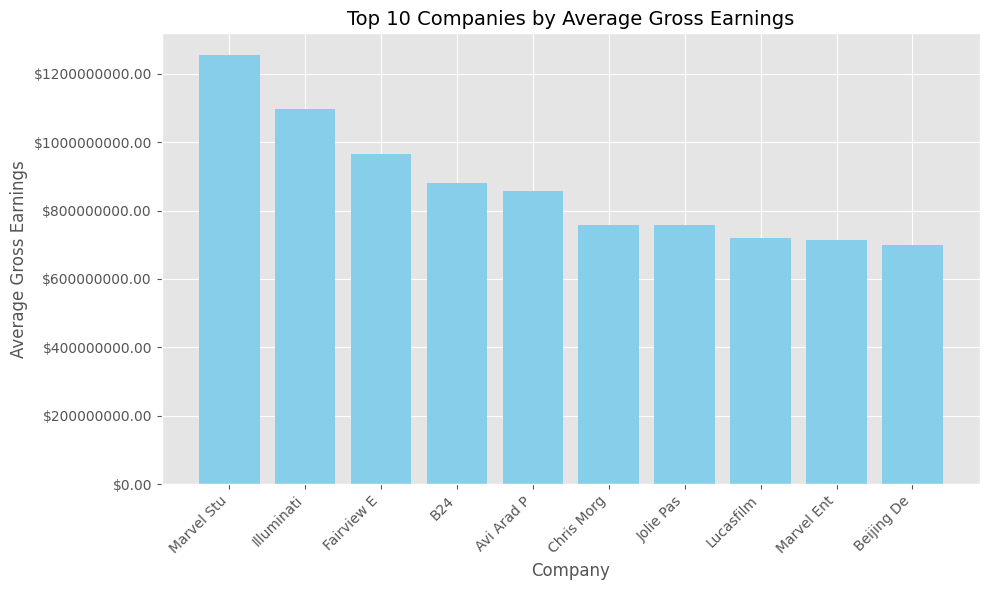

In [70]:
# Creating a histogram to show Top 10 average gross earners


# Select only the 'Company' and 'Average_Gross_Earnings' columns
df_filtered = df[['company', 'Average_Gross_Earnings']].drop_duplicates()

# Sort by average earnings in descending order and select the top 10
top_10_df = df_filtered.sort_values(by='Average_Gross_Earnings', ascending=False).head(10)

# Plotting the bar chart for the top 10 companies
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.bar(top_10_df['company'], top_10_df['Average_Gross_Earnings'], color='skyblue')

# Add title and labels
plt.title('Top 10 Companies by Average Gross Earnings', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Gross Earnings', fontsize=12)

# Format y-axis as dollar values (e.g., $100,000.00)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('$%1.2f'))

# Shorten x-axis labels (e.g., using first 3 letters of company names)
plt.xticks([i for i in range(len(top_10_df))], [name[:10] for name in top_10_df['company']], rotation=45, ha="right")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()